<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
# !nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"
device

2.1.2


device(type='mps')

## 1. What the areas in industry where computer vision is currently being used?

Computer vision is being used in a wide range of industries and applications, thanks to advancements in technology and machine learning algorithms. Some of the areas in industry where computer vision is currently being used include:

1. **Automotive Industry**: Computer vision is used in autonomous vehicles for tasks such as object detection, lane detection, traffic sign recognition, pedestrian detection, and obstacle avoidance.

2. **Retail**: In retail, computer vision is used for tasks such as inventory management, shelf monitoring, customer analytics, and cashier-less checkout systems.

3. **Healthcare**: Computer vision is used for medical image analysis, disease detection, surgical assistance, monitoring patient health, and telemedicine.

4. **Manufacturing**: In manufacturing, computer vision is used for quality control, defect detection, product inspection, object tracking, and robot guidance.

5. **Agriculture**: Computer vision is used for crop monitoring, yield estimation, pest detection, disease identification, and precision agriculture.

6. **Security and Surveillance**: Computer vision is used for facial recognition, object tracking, intrusion detection, crowd analysis, and event detection in security and surveillance systems.

7. **Entertainment and Media**: Computer vision is used for content analysis, video indexing, virtual reality (VR) and augmented reality (AR) applications, facial animation, and special effects in movies and games.

8. **Transportation and Logistics**: Computer vision is used for package sorting, vehicle tracking, license plate recognition, route optimization, and traffic management.

9. **Construction**: In construction, computer vision is used for progress monitoring, safety monitoring, equipment tracking, and site inspection.

10. **Education**: Computer vision is used for automated grading of assignments, interactive learning applications, and educational games.

These are just a few examples, and the applications of computer vision continue to expand as technology advances and new opportunities arise.

## 2-3. What is overfitting in machine learning？

Overfitting in machine learning refers to a situation where a model learns to perform very well on the training data, but it fails to generalize well to new, unseen data. In other words, the model captures noise and random fluctuations in the training data, rather than the underlying true pattern. As a result, the model may perform poorly when it encounters new data that it hasn't seen before.

Overfitting occurs when a model is too complex relative to the amount of training data available. The model essentially memorizes the training data, including its noise and outliers, rather than learning the underlying patterns that generalize well to new data.

Some common causes of overfitting include:

1. **Complexity of the model**: Using a model that is too complex for the given dataset can lead to overfitting. This can happen with models that have too many parameters or degrees of freedom.

2. **Insufficient training data**: When the training dataset is too small, the model may not capture enough variation in the data to learn the underlying patterns accurately. As a result, the model may memorize the training data rather than learning the true relationships.

3. **Noise in the data**: If the training data contains noise or irrelevant features, the model may learn to fit the noise rather than the underlying pattern. This can happen when the dataset is noisy or contains outliers.

4. **Model training duration**: Training a model for too many epochs or iterations can also lead to overfitting. The model may continue to learn the training data too well, even after it has already converged to a good solution.

Overfitting is a common problem in machine learning, and it is important to address it to build models that generalize well to new data. Techniques for addressing overfitting include:

- **Simplifying the model**: Using simpler models with fewer parameters can help reduce overfitting.
- **Increasing the amount of training data**: Providing more training data to the model can help it learn the underlying patterns more accurately.
- **Regularization**: Techniques such as L1 and L2 regularization penalize complex models, discouraging them from fitting the training data too closely.
- **Cross-validation**: Using techniques such as k-fold cross-validation can help assess the generalization performance of the model and detect overfitting.
- **Early stopping**: Stopping the training process early, before the model starts to overfit the training data, can help prevent overfitting.
- **Reduce noise in data/cleanup dataset/introduce data augmentation techniques**: If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets, transforms

In [4]:
# get the MNIST dataset
train_data = datasets.MNIST(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    root='.',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 5325096.37it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 2365377.13it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 3028601.99it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 5512305.78it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [10]:
train_data, test_data, train_data[0][1] # image, label

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 5)

In [13]:
# shape
train_data[0][0].shape # CHW

torch.Size([1, 28, 28])

In [15]:
# get the class name
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

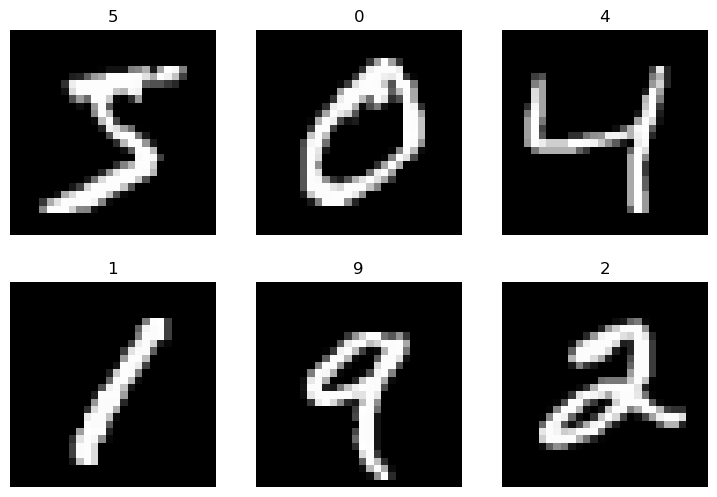

In [17]:
import matplotlib.pyplot as plt

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 6))
rows, cols = 2, 3
for i in range(rows * cols):
    img = train_data[i][0]
    img_squeeze = img.squeeze()
    label = train_data[i][1]
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(img_squeeze, cmap='gray')
    plt.title(label)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [18]:
# create dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

In [19]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x14d60d510>,
 <torch.utils.data.dataloader.DataLoader at 0x14da95450>)

In [20]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [46]:
from torch import nn
class MNIST_MODEL(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # size turn to 14 x 14
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )

    def forward(self, x):
        # print(x.shape)
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [47]:
print(device)
model_mnist = MNIST_MODEL(
    input_shape=1,
    hidden_units=10,
    output_shape=10
).to(device)
model_mnist

mps


MNIST_MODEL(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
# check the state_dict()
model_mnist.state_dict().keys()
model_mnist.state_dict()['conv_block_2.0.weight'].shape
# model_mnist.state_dict()['conv_block_1.0.bias'].shape

torch.Size([10, 10, 3, 3])

In [45]:
# try a dummy tensor on the model
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
model_mnist(dummy_x)

torch.Size([1, 1, 28, 28])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[-0.0094, -0.0749,  0.0653,  0.1076,  0.0791,  0.0604,  0.0248,  0.0320,
          0.0022,  0.0747]], device='mps:0', grad_fn=<LinearBackward0>)

## 9. Train the model on GPU and see how long it takes on each.

In [50]:
# create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model_mnist.parameters(),
    lr=0.1
)

In [53]:
%%time
from tqdm.auto import tqdm

epochs = 5
for epoch in tqdm(range(epochs)):
    ### training loop
    # init train loss
    train_loss_total = 0
    # put model on train mode
    model_mnist.train()
    
    for batch, (X, y) in enumerate(train_dataloader):

        # put data on gpu
        X, y = X.to(device), y.to(device)
        # forward pass
        y_pred = model_mnist(X)
        # loss calculation
        train_loss = loss_fn(y_pred, y)
        train_loss_total += train_loss
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward
        train_loss.backward()
        # step the optimizer
        optimizer.step()

    # adjust train loss to num of batches
    train_loss_total /= len(train_dataloader)

    ### test loop
    # init test loss
    test_loss_total = 0
    # put model on eval mode and turn on inference mode
    model_mnist.eval()
    with torch.inference_mode():

        for batch, (X_test, y_test) in enumerate(test_dataloader):

            # put the data on gpu
            X_test, y_test = X_test.to(device), y_test.to(device)
            # forward pass
            test_pred = model_mnist(X_test)
            # loss calculation
            test_loss = loss_fn(test_pred, y_test)
            test_loss_total += test_loss

        # adjust test loss to num of batches
        test_loss_total /= len(test_dataloader)

    print(f'Epoch: {epoch} | Train Loss: {train_loss_total:.3f} | Test Loss: {test_loss_total:.3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.265 | Test Loss: 0.068
Epoch: 1 | Train Loss: 0.070 | Test Loss: 0.060
Epoch: 2 | Train Loss: 0.055 | Test Loss: 0.058
Epoch: 3 | Train Loss: 0.047 | Test Loss: 0.043
Epoch: 4 | Train Loss: 0.042 | Test Loss: 0.036
CPU times: user 33.9 s, sys: 4.38 s, total: 38.3 s
Wall time: 46.7 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

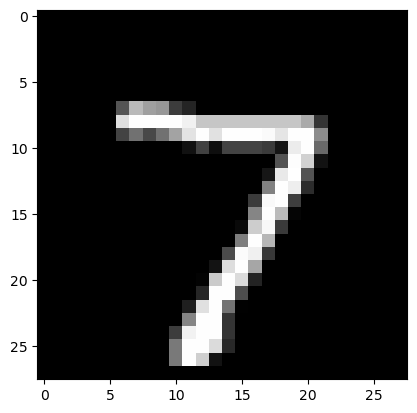

In [54]:
# make prediction with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap='gray')

In [56]:
# logit -> proba -> pred
pred_logits = model_mnist(test_data[0][0].unsqueeze(dim=0).to(device))
pred_probas = torch.softmax(pred_logits, dim=1)
pred_labels = torch.argmax(pred_probas, dim=1)
pred_labels

tensor([7], device='mps:0')

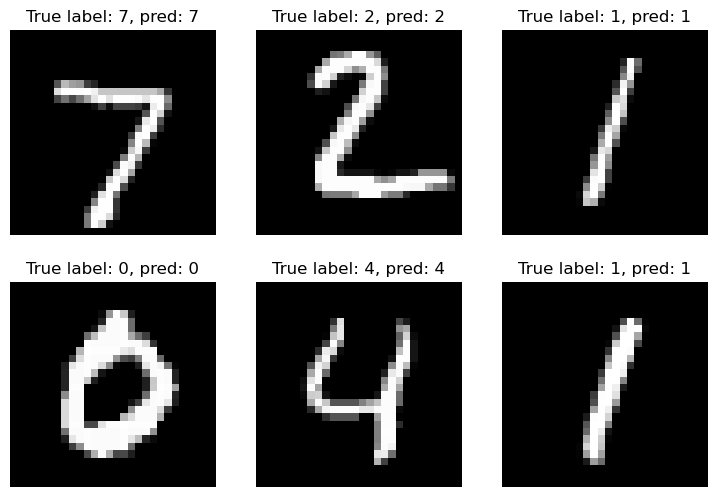

In [59]:
# plot pred labels and images
import matplotlib.pyplot as plt

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 6))
rows, cols = 2, 3
for i in range(rows * cols):
    # get img and label
    img = test_data[i][0]
    img_squeeze = img.squeeze()
    label = test_data[i][1]

    # make predictions on image
    pred_logits = model_mnist(test_data[i][0].unsqueeze(dim=0).to(device))
    pred_probas = torch.softmax(pred_logits, dim=1)
    pred_labels = torch.argmax(pred_probas, dim=1)
    
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(img_squeeze, cmap='gray')
    plt.title(f'True label: {label}, pred: {pred_labels.cpu().item()}')
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [62]:
# see if torchmetric exsits, if not install it
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 0.19.0 or higher'
except:
    !pip install -q torchmetric -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.23.1


In [63]:
# make predictions on all test data
model_mnist.eval()
y_preds = []
with torch.inference_mode():
    for batch, (X, y) in enumerate(test_dataloader):
        X, y = X.to(device), y.to(device)
        y_pred_logits = model_mnist(X)
        y_pred_probas = torch.softmax(y_pred_logits, dim=1)
        y_pred_labels = torch.argmax(y_pred_probas, dim=1)
        y_preds.append(y_pred_labels)

In [70]:
y_preds = torch.cat(y_preds).cpu()
len(y_preds)

10000

In [71]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

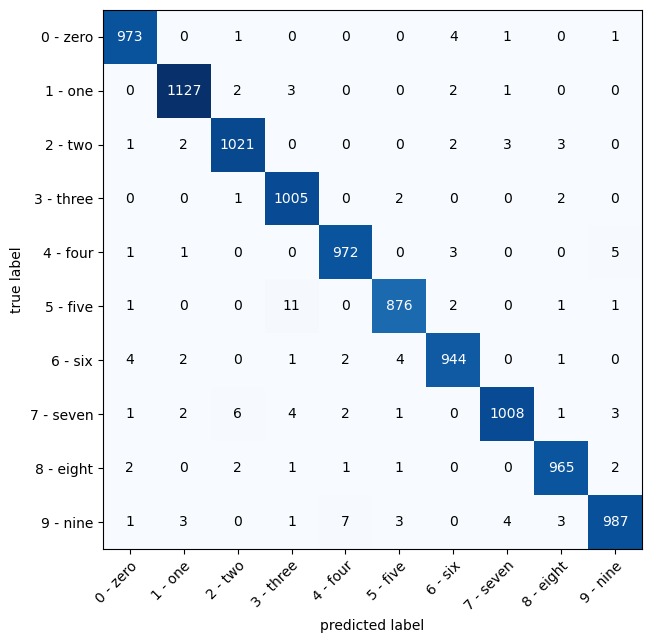

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix
confmat = ConfusionMatrix(
    task='multiclass',
    num_classes=len(class_names)
)
confmat_tensor = confmat(
    preds=y_preds,
    target=test_data.targets
)

# plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [73]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [74]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=64,
    kernel_size=3,
    stride=2,
    padding=1
)

In [75]:
conv_layer(random_tensor).shape

torch.Size([1, 64, 32, 32])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?